In [495]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [496]:
autosleep = pd.read_csv('C:/Users/Bogdan/Desktop/autosleep.csv')
pd.options.display.float_format = "{:,.2f}".format

In [497]:
autosleep.head()

,ISO8601,fromDate,toDate,bedtime,waketime,inBed,awake,fellAsleepIn,sessions,asleep,...,hrv,hrvAvg7,SpO2Avg,SpO2Min,SpO2Max,respAvg,respMin,respMax,tags,notes
0,2022-01-09T20:59:59-05:00,"Saturday, Jan 8, 2022","Sunday, Jan 9, 2022",2022-01-08 22:00:00,2022-01-09 07:23:00,09:23:00,01:41:00,00:00:00,1,07:42:00,...,47,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-10T20:59:59-05:00,"Sunday, Jan 9, 2022","Monday, Jan 10, 2022",2022-01-09 21:44:51,2022-01-10 05:10:00,07:25:08,00:11:08,00:01:09,1,07:14:00,...,67,57,NaN,NaN,NaN,13.50,11.50,15.00,NaN,NaN
2,2022-01-11T20:59:59-05:00,"Monday, Jan 10, 2022","Tuesday, Jan 11, 2022",2022-01-10 21:34:30,2022-01-11 05:04:00,07:29:29,00:40:29,00:10:29,1,06:49:00,...,96,70,NaN,NaN,NaN,13.40,11.00,20.50,NaN,NaN
3,2022-01-12T20:59:59-05:00,"Tuesday, Jan 11, 2022","Wednesday, Jan 12, 2022",2022-01-11 21:56:42,2022-01-12 06:07:00,08:10:17,00:16:17,00:03:17,1,07:54:00,...,82,73,NaN,NaN,NaN,12.90,10.00,19.00,NaN,NaN
4,2022-01-13T20:59:59-05:00,"Wednesday, Jan 12, 2022","Thursday, Jan 13, 2022",2022-01-12 22:11:53,2022-01-13 06:22:00,08:10:06,01:24:06,00:01:07,1,06:46:00,...,87,76,NaN,NaN,NaN,12.60,11.50,16.00,NaN,NaN


In [498]:
list(autosleep.columns.values)

['ISO8601',
 'fromDate',
 'toDate',
 'bedtime',
 'waketime',
 'inBed',
 'awake',
 'fellAsleepIn',
 'sessions',
 'asleep',
 'asleepAvg7',
 'efficiency',
 'efficiencyAvg7',
 'quality',
 'qualityAvg7',
 'deep',
 'deepAvg7',
 'sleepBPM',
 'sleepBPMAvg7',
 'dayBPM',
 'dayBPMAvg7',
 'wakingBPM',
 'wakingBPMAvg7',
 'hrv',
 'hrvAvg7',
 'SpO2Avg',
 'SpO2Min',
 'SpO2Max',
 'respAvg',
 'respMin',
 'respMax',
 'tags',
 'notes']

In [499]:
autosleep.drop(columns=['sessions','SpO2Avg','SpO2Min', 'SpO2Max','tags','notes', 'asleepAvg7', 'efficiencyAvg7', 'deepAvg7', 'qualityAvg7', 'sleepBPMAvg7', 'dayBPMAvg7', 'wakingBPMAvg7','hrvAvg7'], inplace=True)

In [500]:
autosleep.head()

,ISO8601,fromDate,toDate,bedtime,waketime,inBed,awake,fellAsleepIn,asleep,efficiency,quality,deep,sleepBPM,dayBPM,wakingBPM,hrv,respAvg,respMin,respMax
0,2022-01-09T20:59:59-05:00,"Saturday, Jan 8, 2022","Sunday, Jan 9, 2022",2022-01-08 22:00:00,2022-01-09 07:23:00,09:23:00,01:41:00,00:00:00,07:42:00,82.10,04:42:03,00:15:56,65.70,70.30,66.00,47,NaN,NaN,NaN
1,2022-01-10T20:59:59-05:00,"Sunday, Jan 9, 2022","Monday, Jan 10, 2022",2022-01-09 21:44:51,2022-01-10 05:10:00,07:25:08,00:11:08,00:01:09,07:14:00,97.50,04:55:38,00:46:30,57.00,72.60,50.00,67,13.50,11.50,15.00
2,2022-01-11T20:59:59-05:00,"Monday, Jan 10, 2022","Tuesday, Jan 11, 2022",2022-01-10 21:34:30,2022-01-11 05:04:00,07:29:29,00:40:29,00:10:29,06:49:00,91.00,04:47:03,01:30:53,56.00,73.20,53.00,96,13.40,11.00,20.50
3,2022-01-12T20:59:59-05:00,"Tuesday, Jan 11, 2022","Wednesday, Jan 12, 2022",2022-01-11 21:56:42,2022-01-12 06:07:00,08:10:17,00:16:17,00:03:17,07:54:00,96.70,05:15:16,01:47:02,55.40,66.20,57.00,82,12.90,10.00,19.00
4,2022-01-13T20:59:59-05:00,"Wednesday, Jan 12, 2022","Thursday, Jan 13, 2022",2022-01-12 22:11:53,2022-01-13 06:22:00,08:10:06,01:24:06,00:01:07,06:46:00,82.80,04:38:00,01:45:16,56.00,65.50,52.00,87,12.60,11.50,16.00


In [501]:
autosleep['inBed'] = pd.to_timedelta(autosleep['inBed'])
autosleep['inBedHr'] = (autosleep['inBed'].dt.total_seconds()/3600)
autosleep['awake'] = pd.to_timedelta(autosleep['awake'])
autosleep['awakeHr'] = autosleep['awake'].dt.total_seconds()/3600
autosleep['fellAsleepIn'] = pd.to_timedelta(autosleep['fellAsleepIn'])
autosleep['fellAsleepInHr'] = autosleep['fellAsleepIn'].dt.total_seconds()/3600
autosleep['asleep'] = pd.to_timedelta(autosleep['asleep'])
autosleep['asleepHr'] = autosleep['asleep'].dt.total_seconds()/3600
autosleep['deep'] = pd.to_timedelta(autosleep['deep'])
autosleep['deepHr'] = autosleep['deep'].dt.total_seconds()/3600
autosleep['quality'] = pd.to_timedelta(autosleep['quality'])
autosleep['qualityHr'] = autosleep['quality'].dt.total_seconds()/3600

In [502]:
autosleep.head()

,ISO8601,fromDate,toDate,bedtime,waketime,inBed,awake,fellAsleepIn,asleep,efficiency,...,hrv,respAvg,respMin,respMax,inBedHr,awakeHr,fellAsleepInHr,asleepHr,deepHr,qualityHr
0,2022-01-09T20:59:59-05:00,"Saturday, Jan 8, 2022","Sunday, Jan 9, 2022",2022-01-08 22:00:00,2022-01-09 07:23:00,0 days 09:23:00,0 days 01:41:00,0 days 00:00:00,0 days 07:42:00,82.10,...,47,NaN,NaN,NaN,9.38,1.68,0.00,7.70,0.27,4.70
1,2022-01-10T20:59:59-05:00,"Sunday, Jan 9, 2022","Monday, Jan 10, 2022",2022-01-09 21:44:51,2022-01-10 05:10:00,0 days 07:25:08,0 days 00:11:08,0 days 00:01:09,0 days 07:14:00,97.50,...,67,13.50,11.50,15.00,7.42,0.19,0.02,7.23,0.78,4.93
2,2022-01-11T20:59:59-05:00,"Monday, Jan 10, 2022","Tuesday, Jan 11, 2022",2022-01-10 21:34:30,2022-01-11 05:04:00,0 days 07:29:29,0 days 00:40:29,0 days 00:10:29,0 days 06:49:00,91.00,...,96,13.40,11.00,20.50,7.49,0.67,0.17,6.82,1.51,4.78
3,2022-01-12T20:59:59-05:00,"Tuesday, Jan 11, 2022","Wednesday, Jan 12, 2022",2022-01-11 21:56:42,2022-01-12 06:07:00,0 days 08:10:17,0 days 00:16:17,0 days 00:03:17,0 days 07:54:00,96.70,...,82,12.90,10.00,19.00,8.17,0.27,0.05,7.90,1.78,5.25
4,2022-01-13T20:59:59-05:00,"Wednesday, Jan 12, 2022","Thursday, Jan 13, 2022",2022-01-12 22:11:53,2022-01-13 06:22:00,0 days 08:10:06,0 days 01:24:06,0 days 00:01:07,0 days 06:46:00,82.80,...,87,12.60,11.50,16.00,8.17,1.40,0.02,6.77,1.75,4.63


In [503]:
df = autosleep.drop(columns=['ISO8601','fromDate', 'toDate','bedtime','waketime','inBed','awake','fellAsleepIn','asleep','deep','quality'])

In [504]:
df.deepHr = df.deepHr.fillna(0)
df.head(20)

,efficiency,sleepBPM,dayBPM,wakingBPM,hrv,respAvg,respMin,respMax,inBedHr,awakeHr,fellAsleepInHr,asleepHr,deepHr,qualityHr
0,82.10,65.70,70.30,66.00,47,NaN,NaN,NaN,9.38,1.68,0.00,7.70,0.27,4.70
1,97.50,57.00,72.60,50.00,67,13.50,11.50,15.00,7.42,0.19,0.02,7.23,0.78,4.93
2,91.00,56.00,73.20,53.00,96,13.40,11.00,20.50,7.49,0.67,0.17,6.82,1.51,4.78
3,96.70,55.40,66.20,57.00,82,12.90,10.00,19.00,8.17,0.27,0.05,7.90,1.78,5.25
4,82.80,56.00,65.50,52.00,87,12.60,11.50,16.00,8.17,1.40,0.02,6.77,1.75,4.63
5,93.00,59.50,73.50,54.00,109,12.50,10.50,17.00,8.14,0.57,0.04,7.57,0.78,4.73
6,93.70,58.20,75.80,55.00,83,NaN,NaN,NaN,9.00,0.53,0.03,8.47,1.57,5.02
7,90.30,62.00,71.90,55.00,81,13.40,11.50,19.50,9.24,0.89,0.29,8.35,0.51,4.74
8,86.40,56.10,70.70,54.00,168,13.00,10.00,20.00,10.21,1.39,0.46,8.82,2.07,6.04
9,85.60,68.90,74.60,62.00,62,14.00,12.00,16.00,7.11,1.02,0.21,6.08,0.00,3.38


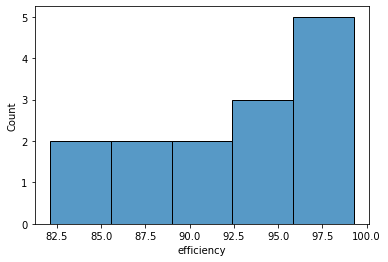

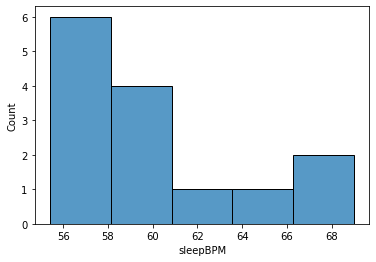

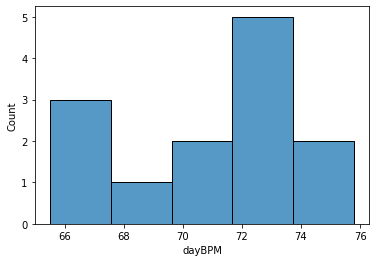

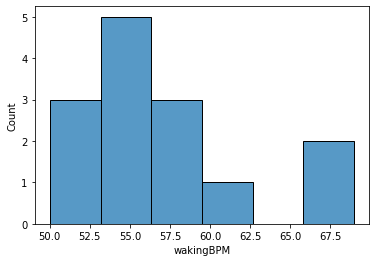

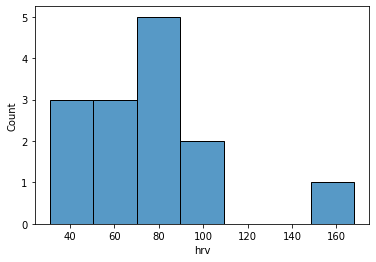

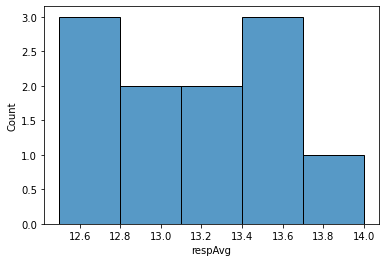

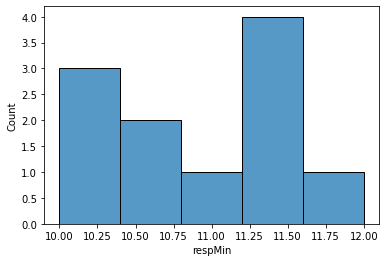

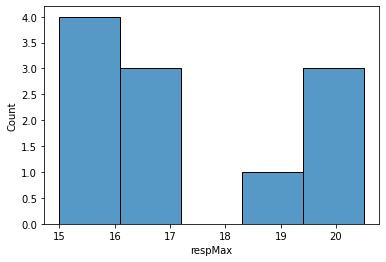

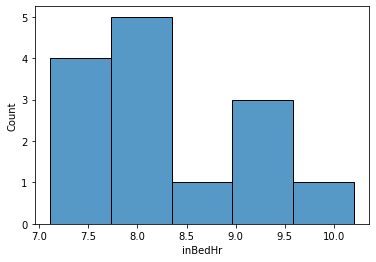

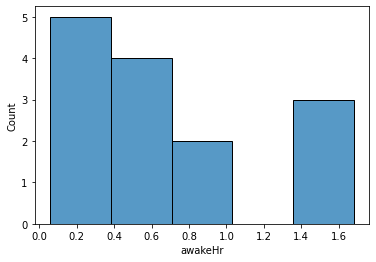

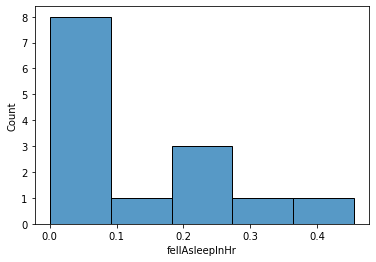

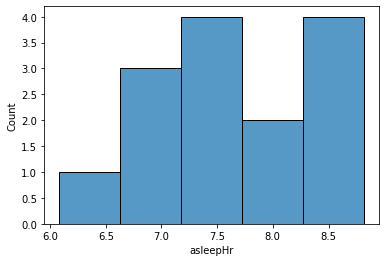

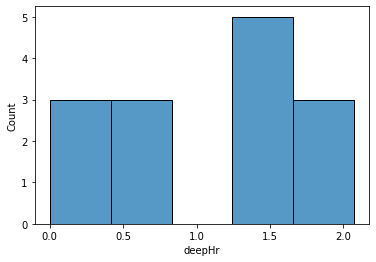

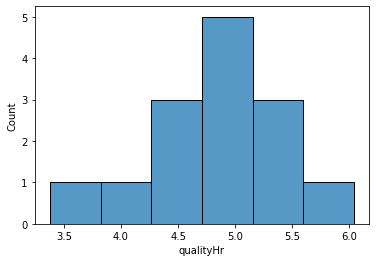

In [505]:
for x in df.columns:
    sns.histplot(data=df, x=x)
    plt.show()

In [506]:
df.corr()

,efficiency,sleepBPM,dayBPM,wakingBPM,hrv,respAvg,respMin,respMax,inBedHr,awakeHr,fellAsleepInHr,asleepHr,deepHr,qualityHr
efficiency,1.00,-0.20,0.05,-0.11,-0.32,-0.17,-0.38,-0.14,-0.34,-0.98,-0.20,0.25,0.08,0.24
sleepBPM,-0.20,1.00,0.34,0.82,-0.56,0.53,0.58,-0.30,-0.16,0.15,-0.16,-0.28,-0.89,-0.73
dayBPM,0.05,0.34,1.00,0.08,0.06,0.41,0.17,0.15,0.02,-0.07,-0.02,0.07,-0.41,-0.17
wakingBPM,-0.11,0.82,0.08,1.00,-0.55,0.26,-0.09,0.01,0.07,0.11,-0.23,0.01,-0.65,-0.42
hrv,-0.32,-0.56,0.06,-0.55,1.00,-0.15,-0.38,0.56,0.49,0.39,0.60,0.32,0.58,0.48
respAvg,-0.17,0.53,0.41,0.26,-0.15,1.00,0.57,-0.03,-0.31,0.08,0.35,-0.39,-0.58,-0.56
respMin,-0.38,0.58,0.17,-0.09,-0.38,0.57,1.00,-0.46,-0.56,0.24,-0.14,-0.75,-0.62,-0.82
respMax,-0.14,-0.30,0.15,0.01,0.56,-0.03,-0.46,1.00,0.58,0.25,0.50,0.49,0.38,0.44
inBedHr,-0.34,-0.16,0.02,0.07,0.49,-0.31,-0.56,0.58,1.00,0.50,0.37,0.83,0.26,0.60
awakeHr,-0.98,0.15,-0.07,0.11,0.39,0.08,0.24,0.25,0.50,1.00,0.25,-0.07,-0.03,-0.09


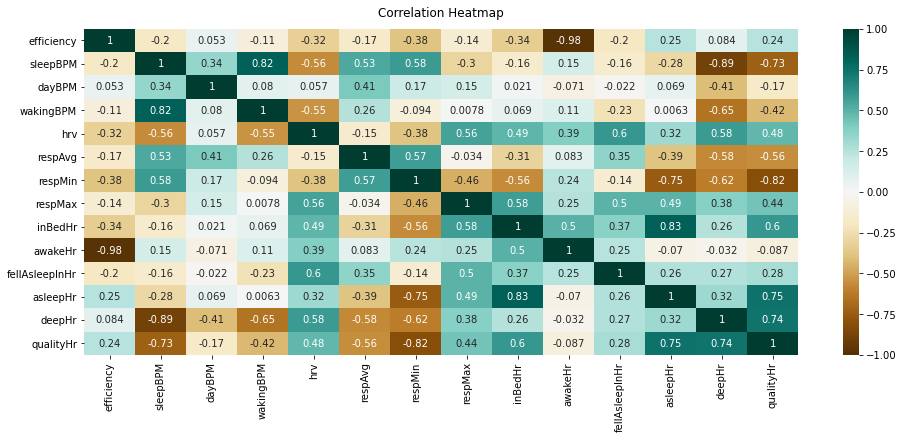

In [507]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [508]:
X = df[['awakeHr','asleepHr','deepHr']]
Y = df.efficiency
#Y = Y.drop(13)
Y.head(20)


0    82.10
1    97.50
2    91.00
3    96.70
4    82.80
5    93.00
6    93.70
7    90.30
8    86.40
9    85.60
10   99.30
11   94.40
12   96.20
13   96.20
Name: efficiency, dtype: float64

In [509]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [510]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [511]:
Y_pred = model.predict(X_test)

In [512]:
print(model.coef_, model.intercept_)

[-10.34740694   0.98231389   0.02649422] 91.73368402553143


In [513]:
print(mean_squared_error(Y_test, Y_pred), r2_score(Y_test, Y_pred))

1.4530245598339349 0.9319815820321159


In [514]:
print(np.mean(cross_val_score(model, X, Y, cv=5)))

0.777653709916234


In [515]:
glucose = pd.read_csv('C:/Users/Bogdan/Desktop/veri.csv')
glucose.head()

,base_time_unix,base_time_string,base_type,glucose_value
0,1638664380,2021-12-04 19:33:00,glucose,98
1,1638665280,2021-12-04 19:48:00,glucose,96
2,1638666180,2021-12-04 20:03:00,glucose,96
3,1638667080,2021-12-04 20:18:00,glucose,92
4,1638667980,2021-12-04 20:33:00,glucose,85


In [516]:
glucose.drop(columns=['base_time_unix','base_type'], inplace=True)
glucose.head()

,base_time_string,glucose_value
0,2021-12-04 19:33:00,98
1,2021-12-04 19:48:00,96
2,2021-12-04 20:03:00,96
3,2021-12-04 20:18:00,92
4,2021-12-04 20:33:00,85


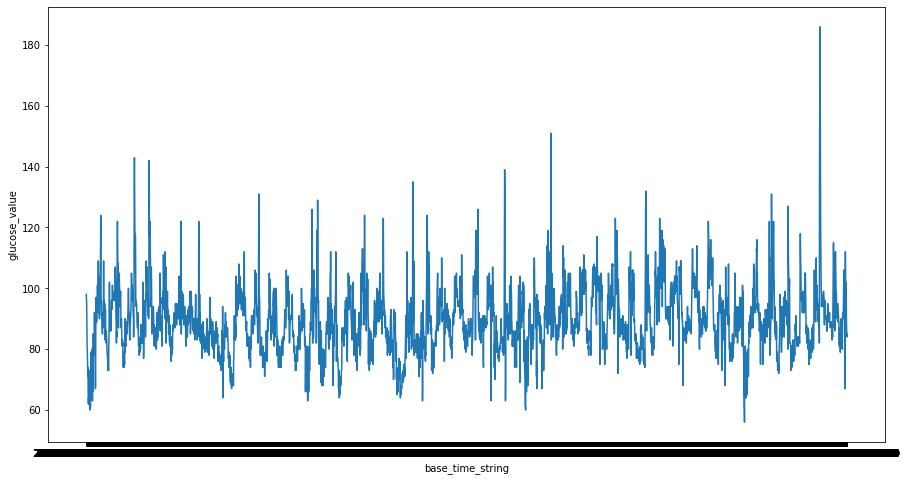

In [306]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'base_time_string', y = 'glucose_value',data = glucose)
plt.show()

In [517]:
glucose.rename(columns={'base_time_string':'waketime'}, inplace=True)

In [518]:
glucose.head()

,waketime,glucose_value
0,2021-12-04 19:33:00,98
1,2021-12-04 19:48:00,96
2,2021-12-04 20:03:00,96
3,2021-12-04 20:18:00,92
4,2021-12-04 20:33:00,85


In [519]:
glucose.dtypes

waketime         object
glucose_value     int64
dtype: object

In [520]:
glucose['waketime'] = pd.to_datetime(glucose['waketime'])

In [521]:
glucose.dtypes

waketime         datetime64[ns]
glucose_value             int64
dtype: object

In [522]:
autosleep['waketime'] = pd.to_datetime(autosleep['waketime'])

In [523]:
autosleep.dtypes

ISO8601                    object
fromDate                   object
toDate                     object
bedtime                    object
waketime           datetime64[ns]
inBed             timedelta64[ns]
awake             timedelta64[ns]
fellAsleepIn      timedelta64[ns]
asleep            timedelta64[ns]
efficiency                float64
quality           timedelta64[ns]
deep              timedelta64[ns]
sleepBPM                  float64
dayBPM                    float64
wakingBPM                 float64
hrv                         int64
respAvg                   float64
respMin                   float64
respMax                   float64
inBedHr                   float64
awakeHr                   float64
fellAsleepInHr            float64
asleepHr                  float64
deepHr                    float64
qualityHr                 float64
dtype: object

In [524]:
finaldf = pd.merge_asof(autosleep, glucose, direction='nearest',on='waketime')

In [525]:
finaldf['bedtime'] = pd.to_datetime(finaldf['bedtime'])

In [526]:
finaldf.head()

,ISO8601,fromDate,toDate,bedtime,waketime,inBed,awake,fellAsleepIn,asleep,efficiency,...,respAvg,respMin,respMax,inBedHr,awakeHr,fellAsleepInHr,asleepHr,deepHr,qualityHr,glucose_value
0,2022-01-09T20:59:59-05:00,"Saturday, Jan 8, 2022","Sunday, Jan 9, 2022",2022-01-08 22:00:00,2022-01-09 07:23:00,0 days 09:23:00,0 days 01:41:00,0 days 00:00:00,0 days 07:42:00,82.10,...,NaN,NaN,NaN,9.38,1.68,0.00,7.70,0.27,4.70,78
1,2022-01-10T20:59:59-05:00,"Sunday, Jan 9, 2022","Monday, Jan 10, 2022",2022-01-09 21:44:51,2022-01-10 05:10:00,0 days 07:25:08,0 days 00:11:08,0 days 00:01:09,0 days 07:14:00,97.50,...,13.50,11.50,15.00,7.42,0.19,0.02,7.23,0.78,4.93,82
2,2022-01-11T20:59:59-05:00,"Monday, Jan 10, 2022","Tuesday, Jan 11, 2022",2022-01-10 21:34:30,2022-01-11 05:04:00,0 days 07:29:29,0 days 00:40:29,0 days 00:10:29,0 days 06:49:00,91.00,...,13.40,11.00,20.50,7.49,0.67,0.17,6.82,1.51,4.78,83
3,2022-01-12T20:59:59-05:00,"Tuesday, Jan 11, 2022","Wednesday, Jan 12, 2022",2022-01-11 21:56:42,2022-01-12 06:07:00,0 days 08:10:17,0 days 00:16:17,0 days 00:03:17,0 days 07:54:00,96.70,...,12.90,10.00,19.00,8.17,0.27,0.05,7.90,1.78,5.25,85
4,2022-01-13T20:59:59-05:00,"Wednesday, Jan 12, 2022","Thursday, Jan 13, 2022",2022-01-12 22:11:53,2022-01-13 06:22:00,0 days 08:10:06,0 days 01:24:06,0 days 00:01:07,0 days 06:46:00,82.80,...,12.60,11.50,16.00,8.17,1.40,0.02,6.77,1.75,4.63,88


In [527]:
glucose.rename(columns={'waketime':'bedtime'}, inplace=True)

In [528]:
ultimatedf = pd.merge_asof(finaldf, glucose, direction='nearest',on='bedtime')

In [529]:
list(ultimatedf.columns)

['ISO8601',
 'fromDate',
 'toDate',
 'bedtime',
 'waketime',
 'inBed',
 'awake',
 'fellAsleepIn',
 'asleep',
 'efficiency',
 'quality',
 'deep',
 'sleepBPM',
 'dayBPM',
 'wakingBPM',
 'hrv',
 'respAvg',
 'respMin',
 'respMax',
 'inBedHr',
 'awakeHr',
 'fellAsleepInHr',
 'asleepHr',
 'deepHr',
 'qualityHr',
 'glucose_value_x',
 'glucose_value_y']

In [530]:
ultimatedf['inBed'] = pd.to_timedelta(ultimatedf['inBed'])
ultimatedf['inBedHr'] = (ultimatedf['inBed'].dt.total_seconds()/3600)
ultimatedf['awake'] = pd.to_timedelta(ultimatedf['awake'])
ultimatedf['awakeHr'] = ultimatedf['awake'].dt.total_seconds()/3600
ultimatedf['fellAsleepIn'] = pd.to_timedelta(ultimatedf['fellAsleepIn'])
ultimatedf['fellAsleepInHr'] = ultimatedf['fellAsleepIn'].dt.total_seconds()/3600
ultimatedf['asleep'] = pd.to_timedelta(ultimatedf['asleep'])
ultimatedf['asleepHr'] = ultimatedf['asleep'].dt.total_seconds()/3600
ultimatedf['deep'] = pd.to_timedelta(ultimatedf['deep'])
ultimatedf['deepHr'] = ultimatedf['deep'].dt.total_seconds()/3600
ultimatedf['quality'] = pd.to_timedelta(ultimatedf['quality'])
ultimatedf['qualityHr'] = ultimatedf['quality'].dt.total_seconds()/3600

In [531]:
cleandf = ultimatedf.drop(columns=['ISO8601','fromDate', 'toDate','bedtime','waketime','inBed','awake','fellAsleepIn','asleep','deep','quality'])
cleandf.rename(columns={'glucose_value_x':'waking_glucose', 'glucose_value_y':'bedtime_glucose'}, inplace=True)

In [532]:
cleandf.deepHr = cleandf.deepHr.fillna(0)


In [533]:
cleandf['glucose_drop'] = cleandf.bedtime_glucose - cleandf.waking_glucose

In [534]:
cleandf.head()

,efficiency,sleepBPM,dayBPM,wakingBPM,hrv,respAvg,respMin,respMax,inBedHr,awakeHr,fellAsleepInHr,asleepHr,deepHr,qualityHr,waking_glucose,bedtime_glucose,glucose_drop
0,82.10,65.70,70.30,66.00,47,NaN,NaN,NaN,9.38,1.68,0.00,7.70,0.27,4.70,78,92,14
1,97.50,57.00,72.60,50.00,67,13.50,11.50,15.00,7.42,0.19,0.02,7.23,0.78,4.93,82,97,15
2,91.00,56.00,73.20,53.00,96,13.40,11.00,20.50,7.49,0.67,0.17,6.82,1.51,4.78,83,99,16
3,96.70,55.40,66.20,57.00,82,12.90,10.00,19.00,8.17,0.27,0.05,7.90,1.78,5.25,85,98,13
4,82.80,56.00,65.50,52.00,87,12.60,11.50,16.00,8.17,1.40,0.02,6.77,1.75,4.63,88,97,9


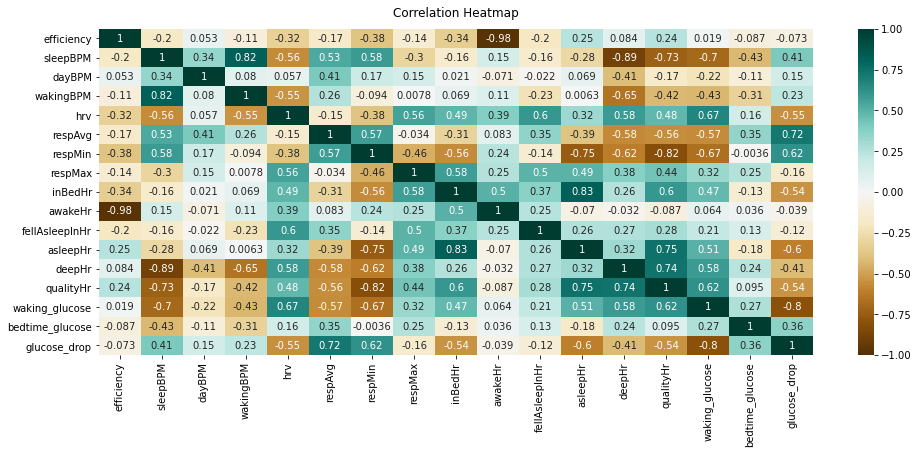

In [535]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cleandf.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [586]:
X1 = cleandf[['efficiency', 'hrv', 'glucose_drop']]
Y1 = cleandf.awakeHr
#Y1 = Y1.drop(13)
Y1.head(20)

0    1.68
1    0.19
2    0.67
3    0.27
4    1.40
5    0.57
6    0.53
7    0.89
8    1.39
9    1.02
10   0.06
11   0.41
12   0.33
13   0.30
Name: awakeHr, dtype: float64

In [612]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2)
model1 = linear_model.LinearRegression()
model1.fit(X1_train, Y1_train)

LinearRegression()

In [613]:
Y1_pred = model1.predict(X1_test)

In [614]:
print(model1.coef_, model1.intercept_)

[-0.0922549   0.00059839 -0.00346309] 9.160264847539453


In [615]:
print(mean_squared_error(Y1_test, Y1_pred), r2_score(Y1_test, Y1_pred))

0.016515873247427433 0.9104131593850384


In [616]:
print(np.mean(cross_val_score(model1, X1, Y1, cv=3)))

0.7239517429202671
